# The world university rankings 2016-2024


## Introduction

While choosing a university, it's common to rely on global or country-specific rankings for an initial assessment; however, we emphasize the importance of considering factors beyond rankings, such as research environment, teaching quality, international student support, and industry connections. "The World University Rankings 2016-2024" dataset consist of all those elements. Our key question is What should student look for when they are deciding on a university. In simple words, what are the key metrics that the students should consider when choosing a university. In our analysis, we will explore the dataset, employing linear regression model to evaluate universities based on various key metrics.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
sns.set()
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from time import time
from sklearn.linear_model import Ridge, Lasso, SGDRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

# EDA - Explore the dataset
Before we explore the dataset, we first imported the university dataset into the collab notebook and look through its dtype, duplicate values and null values. In addition, we changed the coloumn names to make it more standardized and readable.

In [ ]:
university = pd.read_csv('THE World University Rankings 2016-2024.csv', encoding = 'latin-1')
university.head()

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year
0,1.0,California Institute of Technology,United States,2243,6.9,26%,33 : 67,95.2,95.6,97.6,99.8,97.8,64.0,2016
1,2.0,University of Oxford,United Kingdom,19920,11.6,34%,46:54:00,94.2,86.5,98.9,98.8,73.1,94.4,2016
2,3.0,Stanford University,United States,15596,7.8,22%,42:58:00,93.9,92.5,96.2,99.9,63.3,76.3,2016
3,4.0,University of Cambridge,United Kingdom,18810,11.8,34%,46:54:00,92.8,88.2,96.7,97.0,55.0,91.5,2016
4,5.0,Massachusetts Institute of Technology,United States,11074,9.0,33%,37 : 63,92.0,89.4,88.6,99.7,95.4,84.0,2016


In [ ]:
university.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12430 entries, 0 to 12429
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     12430 non-null  float64
 1   Name                     12430 non-null  object 
 2   Country                  12430 non-null  object 
 3   Student Population       12430 non-null  int64  
 4   Students to Staff Ratio  12430 non-null  float64
 5   International Students   12430 non-null  object 
 6   Female to Male Ratio     11839 non-null  object 
 7   Overall Score            12430 non-null  float64
 8   Teaching                 12430 non-null  float64
 9   Research Environment     12430 non-null  float64
 10  Research Quality         12430 non-null  float64
 11  Industry Impact          12430 non-null  float64
 12  International Outlook    12430 non-null  float64
 13  Year                     12430 non-null  int64  
dtypes: float64(8), int64(2

In [ ]:
university.nunique()

Rank                        1904
Name                        2105
Country                      108
Student Population         10724
Students to Staff Ratio      655
International Students        89
Female to Male Ratio          90
Overall Score              10636
Teaching                     757
Research Environment         885
Research Quality             993
Industry Impact              870
International Outlook        883
Year                           9
dtype: int64

In [ ]:
university.duplicated().sum()

0

In [ ]:
university.isna().sum()

Rank                         0
Name                         0
Country                      0
Student Population           0
Students to Staff Ratio      0
International Students       0
Female to Male Ratio       591
Overall Score                0
Teaching                     0
Research Environment         0
Research Quality             0
Industry Impact              0
International Outlook        0
Year                         0
dtype: int64

In [ ]:
university.columns = university.columns.str.strip().str.lower().str.replace(' ', '_')
university.head()

,rank,name,country,student_population,students_to_staff_ratio,international_students,female_to_male_ratio,overall_score,teaching,research_environment,research_quality,industry_impact,international_outlook,year
0,1.0,California Institute of Technology,United States,2243,6.9,26%,33 : 67,95.2,95.6,97.6,99.8,97.8,64.0,2016
1,2.0,University of Oxford,United Kingdom,19920,11.6,34%,46:54:00,94.2,86.5,98.9,98.8,73.1,94.4,2016
2,3.0,Stanford University,United States,15596,7.8,22%,42:58:00,93.9,92.5,96.2,99.9,63.3,76.3,2016
3,4.0,University of Cambridge,United Kingdom,18810,11.8,34%,46:54:00,92.8,88.2,96.7,97.0,55.0,91.5,2016
4,5.0,Massachusetts Institute of Technology,United States,11074,9.0,33%,37 : 63,92.0,89.4,88.6,99.7,95.4,84.0,2016


# EDA - Cleaning the dataset

Since we only have 'Female to Male Ratio' column contains NA values and in the data type of object, we decide to transform this column to one single number that represent how many female are there in one male.

In [ ]:
# We unify the formate for 'Female to Male Ratio' column
university['female_to_male_ratio'] = university['female_to_male_ratio'].str.replace(':00', '')
university['female_to_male_ratio'] = university['female_to_male_ratio'].str.replace(' ', '')

In [ ]:
university['female_to_male_ratio'] = university['female_to_male_ratio'].replace('100', '1')

In [ ]:
university['female_to_male_ratio']

0        33:67
1        46:54
2        42:58
3        46:54
4        37:63
         ...  
12425    56:44
12426    50:50
12427    49:51
12428    66:34
12429    60:40
Name: female_to_male_ratio, Length: 12430, dtype: object

In [ ]:
def convert_ratio_to_decimal(ratio):
    if ':' in str(ratio):
        parts = ratio.split(':')
        if len(parts) == 2 and parts[1] != '0':
            female, male = map(int, parts)
            return round(female / male, 2)
    else:
        return float(ratio)

university['female_to_male_ratio'] = university['female_to_male_ratio'].apply(convert_ratio_to_decimal)


In [ ]:
filtered_university = university[university['female_to_male_ratio'] > 10]
filtered_university['female_to_male_ratio']

5285     19.0
6633     49.0
8295     49.0
11856    99.0
Name: female_to_male_ratio, dtype: float64

In [ ]:
university['female_to_male_ratio'] = university['female_to_male_ratio'].replace(19.0, 0.19)
university['female_to_male_ratio'] = university['female_to_male_ratio'].replace(49.0, 0.49)
university['female_to_male_ratio'] = university['female_to_male_ratio'].replace(99, 0.99)

In [ ]:
university['female_to_male_ratio']

0        0.49
1        0.85
2        0.72
3        0.85
4        0.59
         ... 
12425    1.27
12426    1.00
12427    0.96
12428    1.94
12429    1.50
Name: female_to_male_ratio, Length: 12430, dtype: float64

In [ ]:
university['female_to_male_ratio'].isnull().sum().sum()

591

In [ ]:
university['female_to_male_ratio'].dropna(0, inplace=True)
university['female_to_male_ratio'].isnull().sum().sum()

<ipython-input-16-5430b0ff38a4>:1: FutureWarning: In a future version of pandas all arguments of Series.dropna will be keyword-only.
  university['female_to_male_ratio'].dropna(0, inplace=True)


591

After that, we convert the "International Students" column from object values (with percentages) to numerical values (as int64)

In [ ]:
university['international_students'] = university['international_students'].str.replace('%', '').replace('', np.nan)
university['international_students'] = university['international_students'].fillna(0)
university['international_students'] = university['international_students'].astype('int64')/ 100

In [ ]:
university['international_students']

0        0.26
1        0.34
2        0.22
3        0.34
4        0.33
         ... 
12425    0.12
12426    0.01
12427    0.00
12428    0.00
12429    0.03
Name: international_students, Length: 12430, dtype: float64

In [ ]:
university.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12430 entries, 0 to 12429
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     12430 non-null  float64
 1   name                     12430 non-null  object 
 2   country                  12430 non-null  object 
 3   student_population       12430 non-null  int64  
 4   students_to_staff_ratio  12430 non-null  float64
 5   international_students   12430 non-null  float64
 6   female_to_male_ratio     11839 non-null  float64
 7   overall_score            12430 non-null  float64
 8   teaching                 12430 non-null  float64
 9   research_environment     12430 non-null  float64
 10  research_quality         12430 non-null  float64
 11  industry_impact          12430 non-null  float64
 12  international_outlook    12430 non-null  float64
 13  year                     12430 non-null  int64  
dtypes: float64(10), int64(

# EDA - Visualize the data

## Top 20 countries with the highest number of universities
The plot below analyses the top 20 countries with the highest number of universities. US is top with more 1400 universities, followed by Japan, UK, China and India.

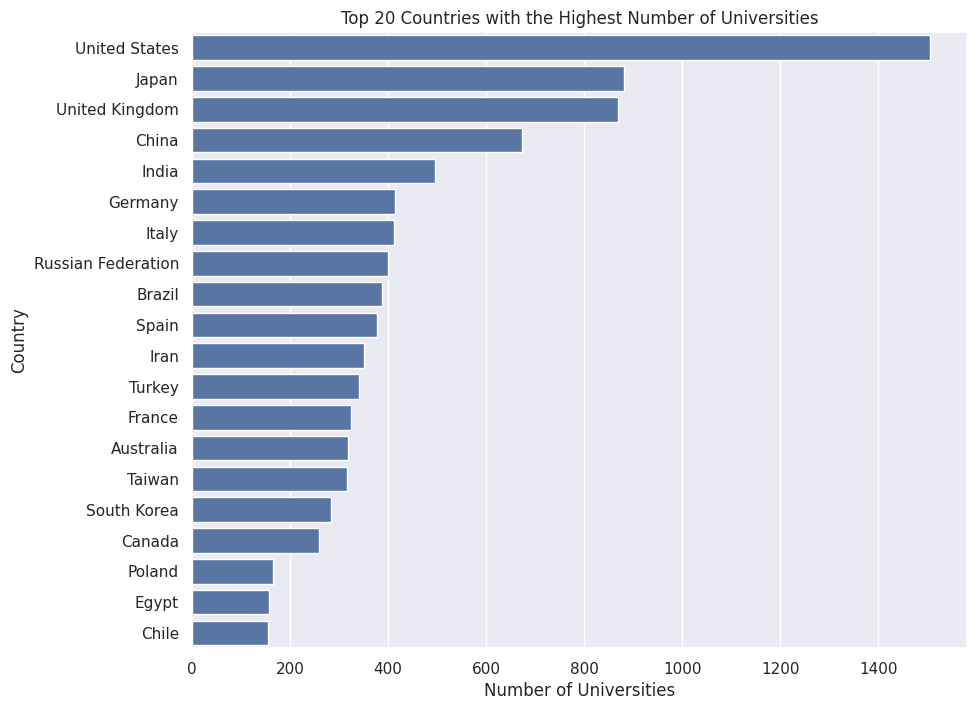

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=university, y='country', order=university['country'].value_counts().head(20).index)
plt.title('Top 20 Countries with the Highest Number of Universities')
plt.xlabel('Number of Universities')
plt.ylabel('Country')
plt.show()


## Top 5 Countries with the Highest International Students
Here we analyse the countries with the highest international student. The Northern Cyprus, follwed by Macao and Luxembourg. Which does lead to a question to what makes a university more appealing to international students.

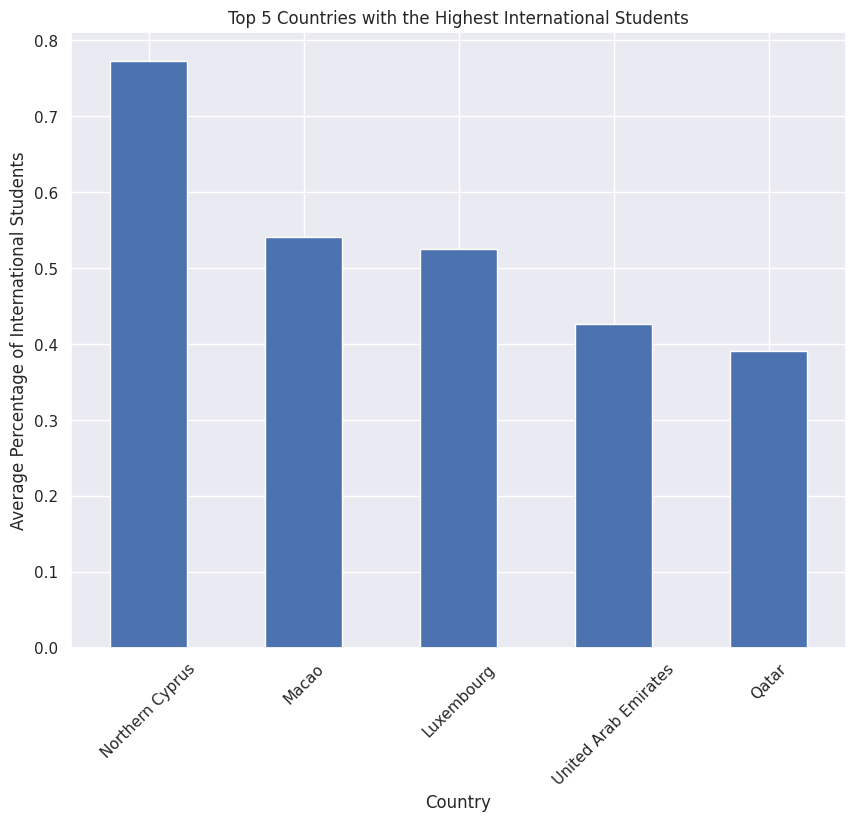

In [ ]:
# Top 5 countries with the highest international students
top_5_int_students = university.groupby('country')['international_students'].mean().nlargest(5)
plt.figure(figsize=(10, 8))
top_5_int_students.plot(kind='bar')
plt.title('Top 5 Countries with the Highest International Students')
plt.xlabel('Country')
plt.ylabel('Average Percentage of International Students')
plt.xticks(rotation=45)
plt.show()


## Relationship Between "Female to 1 Male Ratio" and "Overall Score"

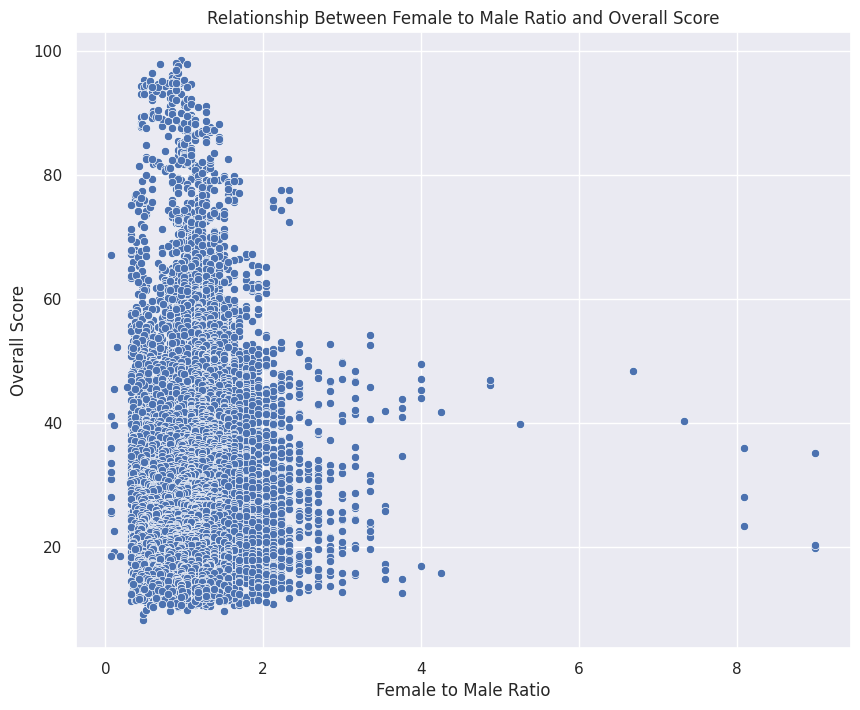

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=university, x='female_to_male_ratio', y='overall_score')
plt.title('Relationship Between Female to Male Ratio and Overall Score')
plt.xlabel('Female to Male Ratio')
plt.ylabel('Overall Score')
plt.show()


From this chart, we can see that the majority of schools with a 0-2 female-to-male ratio score within a good range for the overall score, from the lowest to the highest. In comparison to the schools with a high female-to-male ratio (which indicates a 5-8 female to 1 male ratio), the highest overall score is around the 50-point neighborhood. It is fair to say that schools with a balanced female-to-male ratio have a higher potential to achieve a good overall score. The reason for this could be that there is a high chance that schools with a high female-to-male ratio are more focused on arts and social sciences, compared to schools that have a balanced of female-to-male ratio, which might have a more diversed subjects taught at school.

## Shift in Top 10 "Overall Score" from 2016-2024
The plot shows the trend of overall score from 2016 - 2024. We can notive that 2024 had relatively higher overall scores compared to all the other years, with more universities scoring aboive 98. On the other hand 2018 has the lowest overall scores trend.

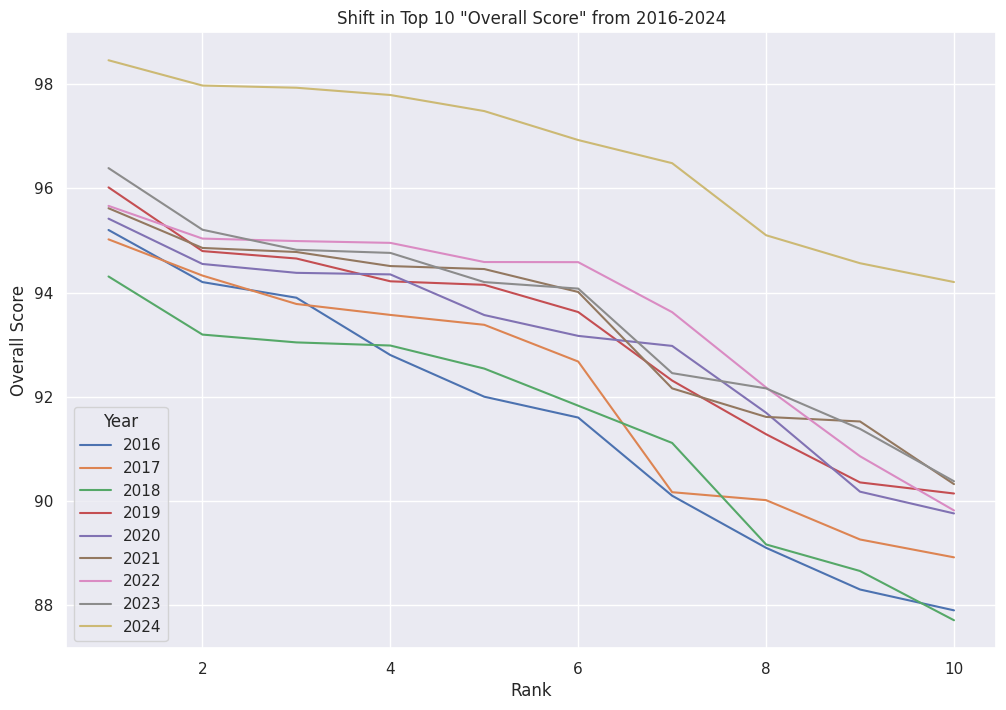

In [ ]:
plt.figure(figsize=(12, 8))
for year in range(2016, 2025):
    yearly_data = university[university['year'] == year].nlargest(10, 'overall_score')
    sns.lineplot(x='rank', y='overall_score', data=yearly_data, label=year)
plt.title('Shift in Top 10 "Overall Score" from 2016-2024')
plt.xlabel('Rank')
plt.ylabel('Overall Score')
plt.legend(title='Year')
plt.show()


## Top 10 Countries with the Highest Sum of Industry Impact
An important criteria we would believe for the students before choosing a university or a country they would like to go to would be the impact it has on the industry. So we explores the top 10 countries with the highest sum of industry impact. The plot below shows US on the top, followed by China, Japan and UK which very much aligns to the fact that these are the countries that have the highest number of universities as well.

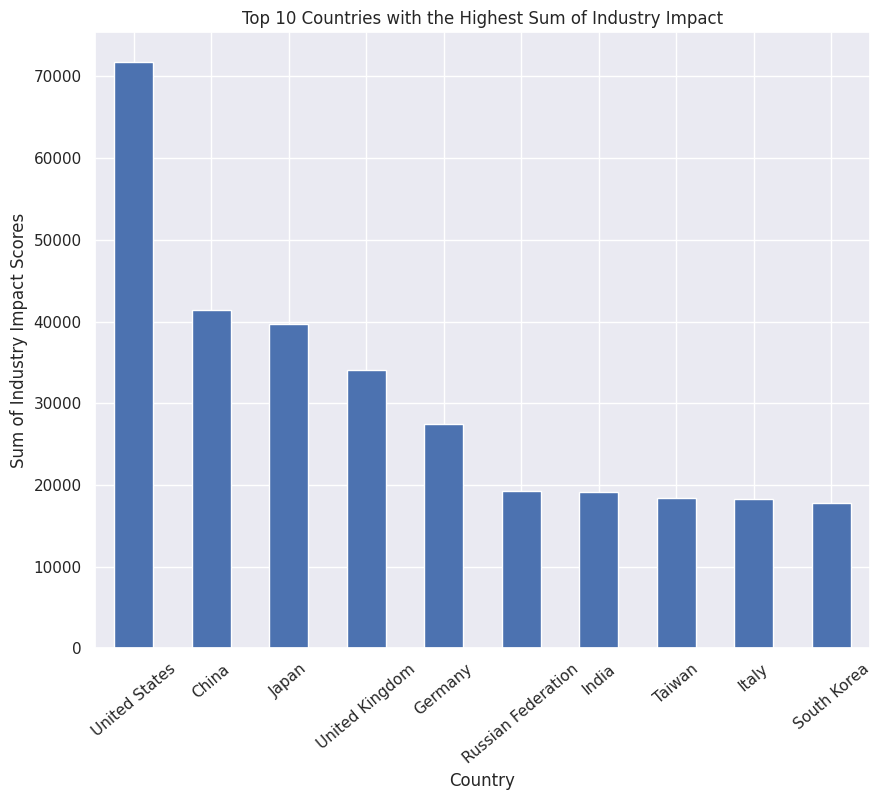

In [ ]:
# Top 10 countries with the highest sum of industry impact
top_10_industry_impact = university.groupby('country')['industry_impact'].sum().nlargest(10)
plt.figure(figsize=(10, 8))
top_10_industry_impact.plot(kind='bar')
plt.title('Top 10 Countries with the Highest Sum of Industry Impact')
plt.xlabel('Country')
plt.ylabel('Sum of Industry Impact Scores')
plt.xticks(rotation=40)
plt.show()


## Pair Plot of Key University Metrics
Here we explore the key metrics relationship with overall score as well as eachother. This plot helps visualise the relationships as well as give an idea on what relationships could be explored.

<Figure size 1600x1200 with 0 Axes>

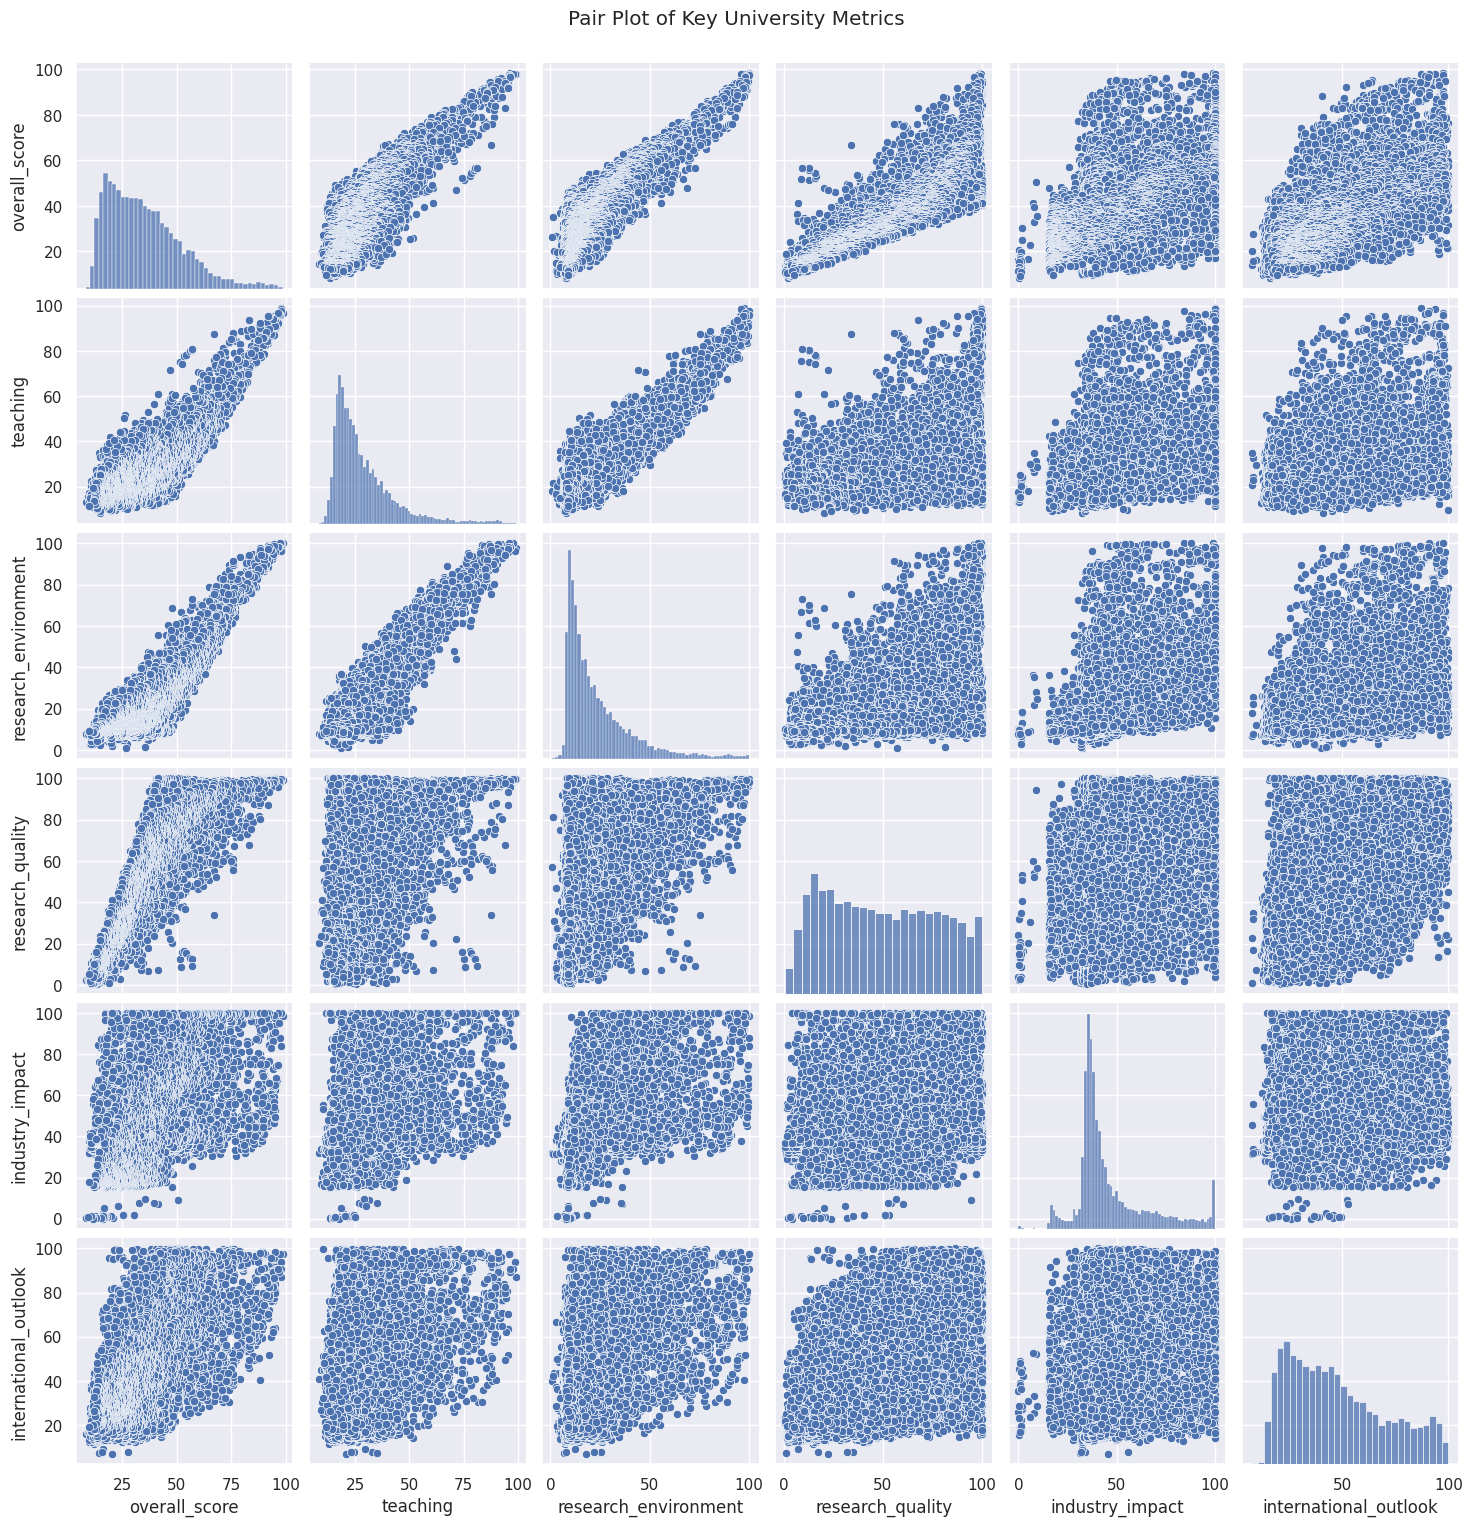

In [ ]:
selected_vars = ['overall_score', 'teaching', 'research_environment', 'research_quality',
                 'industry_impact','international_outlook']
plt.figure(figsize=(16, 12))
sns.pairplot(university[selected_vars])
plt.suptitle('Pair Plot of Key University Metrics', y=1.02)
plt.show()

# Prepare the Dataset for Linear Regression

After EDA and data cleaning, we have convert most of the data to numerical data, however, we still have categorical columns like Name and Country.
For the Name column, since they are all unique for each university, it might not be useful for regression, therefore, we can exclude it from the testing, same thing go with the Rank column. As for the country column, we could include it as a feature by converting it into a numerical format using one-hot encoding.

## Correlation without 'Country' , 'Name' and 'Rank' column

In [ ]:
university_clean = university.drop(['country', 'name', 'rank'], axis=1)
corr_matrix_clean = university_clean.corr()
corr_matrix_clean

,student_population,students_to_staff_ratio,international_students,female_to_male_ratio,overall_score,teaching,research_environment,research_quality,industry_impact,international_outlook,year
student_population,1.000000,0.691228,-0.094012,0.018431,-0.012367,-0.016301,0.014222,-0.015748,-0.001781,-0.047217,-0.026461
students_to_staff_ratio,0.691228,1.000000,-0.033555,0.014207,-0.026820,-0.112766,-0.000987,0.000714,0.022277,0.007265,-0.019038
international_students,-0.094012,-0.033555,1.000000,0.058841,0.546913,0.399767,0.480662,0.424421,0.215924,0.810782,-0.054533
female_to_male_ratio,0.018431,0.014207,0.058841,1.000000,0.024673,-0.066755,-0.065025,0.100034,-0.196977,0.166176,0.062483
overall_score,-0.012367,-0.026820,0.546913,0.024673,1.000000,0.839573,0.898838,0.876867,0.475429,0.645225,-0.024008
teaching,-0.016301,-0.112766,0.399767,-0.066755,0.839573,1.000000,0.893647,0.528316,0.474251,0.373046,-0.058149
research_environment,0.014222,-0.000987,0.480662,-0.065025,0.898838,0.893647,1.000000,0.601976,0.553245,0.513392,-0.065097
research_quality,-0.015748,0.000714,0.424421,0.100034,0.876867,0.528316,0.601976,1.000000,0.267336,0.576993,0.010223
industry_impact,-0.001781,0.022277,0.215924,-0.196977,0.475429,0.474251,0.553245,0.267336,1.000000,0.221746,0.017414
international_outlook,-0.047217,0.007265,0.810782,0.166176,0.645225,0.373046,0.513392,0.576993,0.221746,1.000000,0.013657


To start our regression we made a correlation matrix to understand the different relationships.

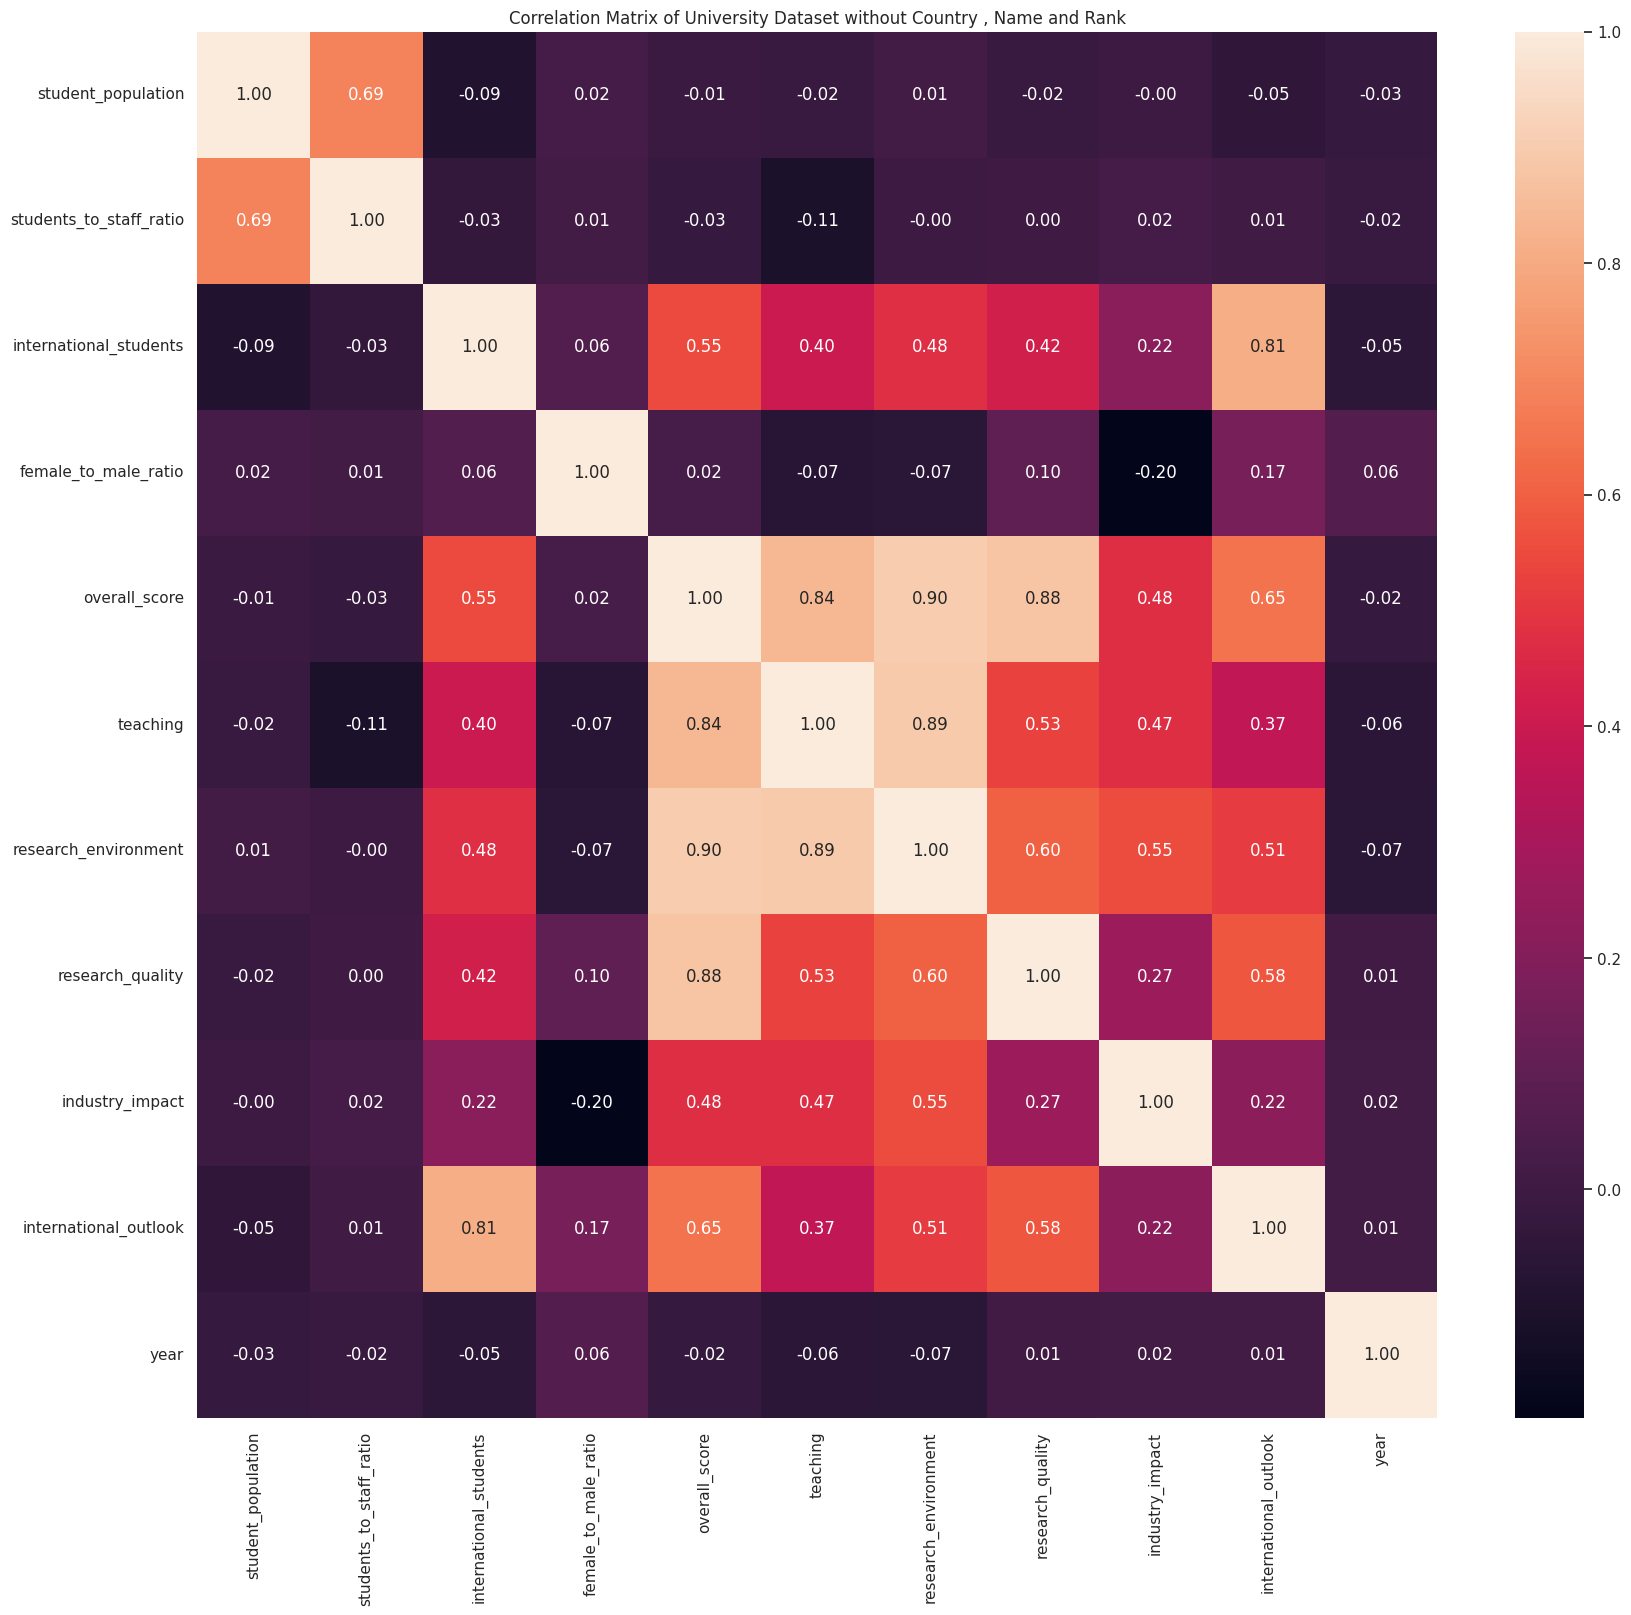

In [ ]:
# Correlatioin matrix
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix_clean, annot=True, fmt=".2f", cmap='rocket')
plt.title('Correlation Matrix of University Dataset without Country , Name and Rank')
plt.show()

## Correlation with 'Country' but without 'Name' and 'Rank' column

In [ ]:
!pip install pycountry-convert
import pycountry_convert as pc

# Function to get continent from country
def get_continent(country):
    try:
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return None

# Create a new 'Continent' column
university['continent'] = university['country'].apply(get_continent)

# Display the DataFrame with the added 'Continent' column
print(university[['country', 'continent']])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.0/234.0 kB 23.9 MB/s eta 0:00:00
                  country      continent
0           United States  North America
1          United Kingdom         Europe
2           United States  North America
3          United Kingdom         Europe
4           United States  North America
...                   ...            ...
12425  Russian Federation         Europe
12426                Peru  South America
12427              Brazil  South America
12428              Brazil  South America
12429  Russian Federation         Europe

[12430 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/pycountry/db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
/usr/local/lib/python3.10/dist-packages/pycountry/db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


In [ ]:
# One-hot encode 'Continent'
one_hot_encoded_continent = pd.get_dummies(university['continent'], prefix='continent')

# Drop the columns that are not necessary for leaner regression and concatenate the one-hot encoded dataframe
university = pd.concat([university.drop(['continent'], axis=1), one_hot_encoded_continent], axis=1)
university.drop('name',axis=1,inplace=True)
university.drop('rank',axis=1,inplace=True)
university.drop('country',axis=1,inplace=True)
university

,student_population,students_to_staff_ratio,international_students,female_to_male_ratio,overall_score,teaching,research_environment,research_quality,industry_impact,international_outlook,year,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,2243,6.9,0.26,0.49,95.2000,95.6,97.6,99.8,97.8,64.0,2016,0,0,0,1,0,0
1,19920,11.6,0.34,0.85,94.2000,86.5,98.9,98.8,73.1,94.4,2016,0,0,1,0,0,0
2,15596,7.8,0.22,0.72,93.9000,92.5,96.2,99.9,63.3,76.3,2016,0,0,0,1,0,0
3,18810,11.8,0.34,0.85,92.8000,88.2,96.7,97.0,55.0,91.5,2016,0,0,1,0,0,0
4,11074,9.0,0.33,0.59,92.0000,89.4,88.6,99.7,95.4,84.0,2016,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12425,17934,17.2,0.12,1.27,12.1935,14.3,8.7,7.8,16.3,32.8,2024,0,0,1,0,0,0
12426,56595,21.1,0.01,1.00,12.1470,13.5,8.7,10.1,15.6,26.5,2024,0,0,0,0,0,1
12427,8687,12.4,0.00,0.96,11.9910,19.1,9.0,5.7,16.6,18.3,2024,0,0,0,0,0,1
12428,25067,11.9,0.00,1.94,11.5655,19.3,8.6,4.1,16.2,20.0,2024,0,0,0,0,0,1


In [ ]:
# Correlation with 'Continent' , but without 'Name', 'Country' and 'Rank' column
corr_matrix = university.corr()
corr_matrix

,student_population,students_to_staff_ratio,international_students,female_to_male_ratio,overall_score,teaching,research_environment,research_quality,industry_impact,international_outlook,year,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
student_population,1.000000,0.691228,-0.094012,0.018431,-0.012367,-0.016301,0.014222,-0.015748,-0.001781,-0.047217,-0.026461,0.213481,-0.047333,-0.076669,0.037463,-0.005973,0.019168
students_to_staff_ratio,0.691228,1.000000,-0.033555,0.014207,-0.026820,-0.112766,-0.000987,0.000714,0.022277,0.007265,-0.019038,0.117051,-0.065464,0.047209,-0.065484,0.086861,-0.027765
international_students,-0.094012,-0.033555,1.000000,0.058841,0.546913,0.399767,0.480662,0.424421,0.215924,0.810782,-0.054533,-0.153324,-0.316793,0.338349,0.060983,0.253220,-0.204730
female_to_male_ratio,0.018431,0.014207,0.058841,1.000000,0.024673,-0.066755,-0.065025,0.100034,-0.196977,0.166176,0.062483,0.044808,-0.204190,0.157894,0.007707,0.075078,-0.019887
overall_score,-0.012367,-0.026820,0.546913,0.024673,1.000000,0.839573,0.898838,0.876867,0.475429,0.645225,-0.024008,-0.109861,-0.287786,0.155608,0.297906,0.133480,-0.201265
teaching,-0.016301,-0.112766,0.399767,-0.066755,0.839573,1.000000,0.893647,0.528316,0.474251,0.373046,-0.058149,-0.128868,-0.135057,0.017169,0.308804,0.005277,-0.132064
research_environment,0.014222,-0.000987,0.480662,-0.065025,0.898838,0.893647,1.000000,0.601976,0.553245,0.513392,-0.065097,-0.128251,-0.192907,0.090328,0.254524,0.098903,-0.151599
research_quality,-0.015748,0.000714,0.424421,0.100034,0.876867,0.528316,0.601976,1.000000,0.267336,0.576993,0.010223,-0.062747,-0.309991,0.175443,0.275104,0.143515,-0.209294
industry_impact,-0.001781,0.022277,0.215924,-0.196977,0.475429,0.474251,0.553245,0.267336,1.000000,0.221746,0.017414,-0.112796,0.069476,0.005954,0.020881,0.044987,-0.125209
international_outlook,-0.047217,0.007265,0.810782,0.166176,0.645225,0.373046,0.513392,0.576993,0.221746,1.000000,0.013657,-0.034271,-0.431521,0.361575,0.058892,0.290463,-0.143625


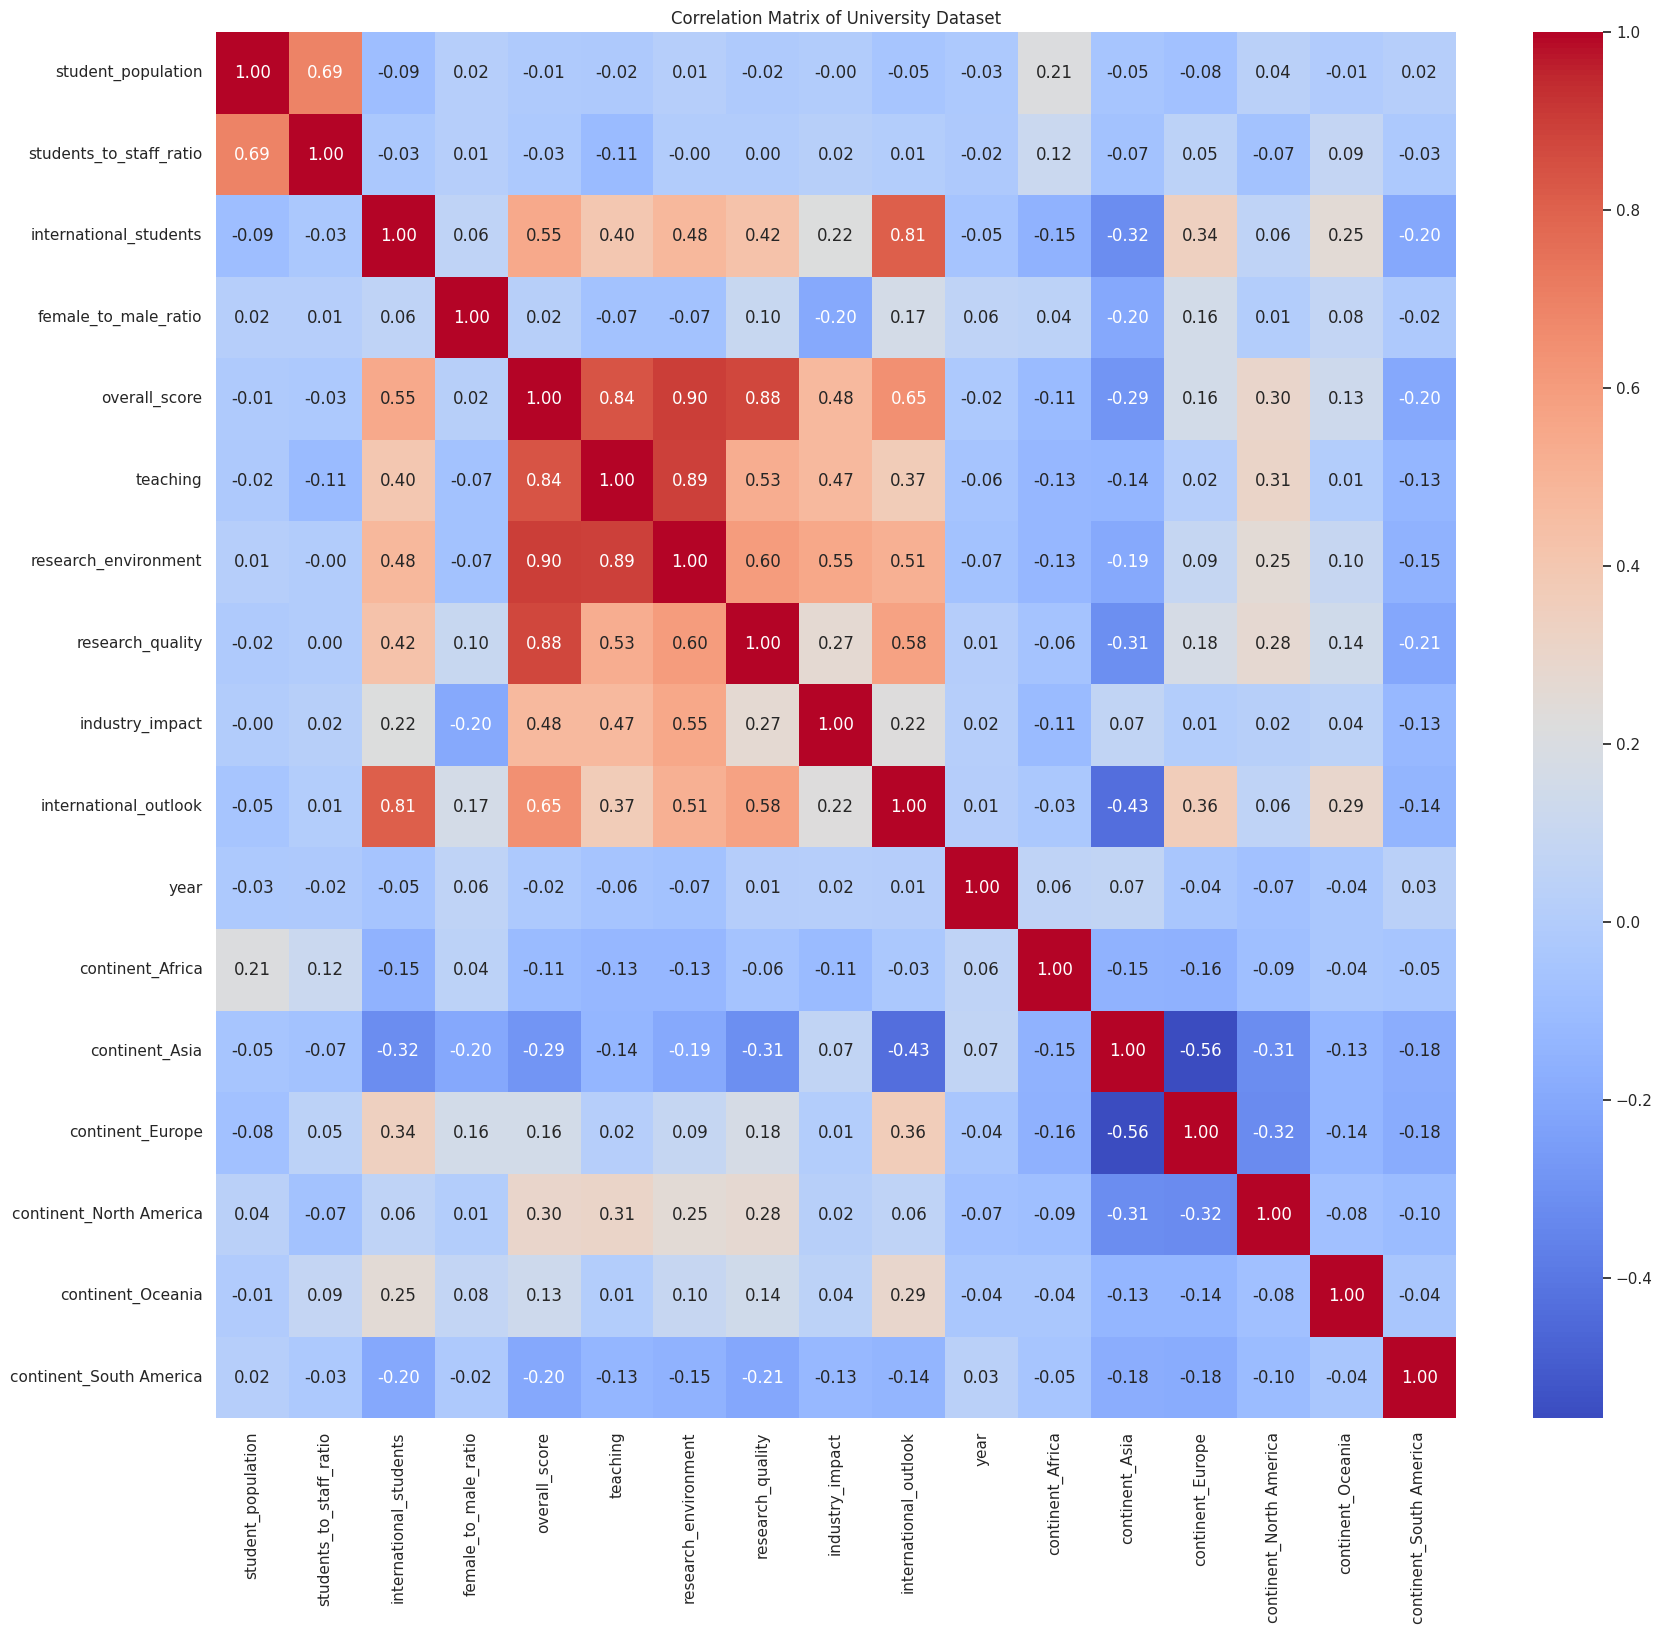

In [ ]:
# Correlatioin matrix
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of University Dataset')
plt.show()

# Assumptions for Linear Regressions

## 1. Linearity
Linear regression needs the relationship between the independent and dependent variables to be linear. Let's use a pair plot to check the relation of independent variables with the Overall Score variable.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


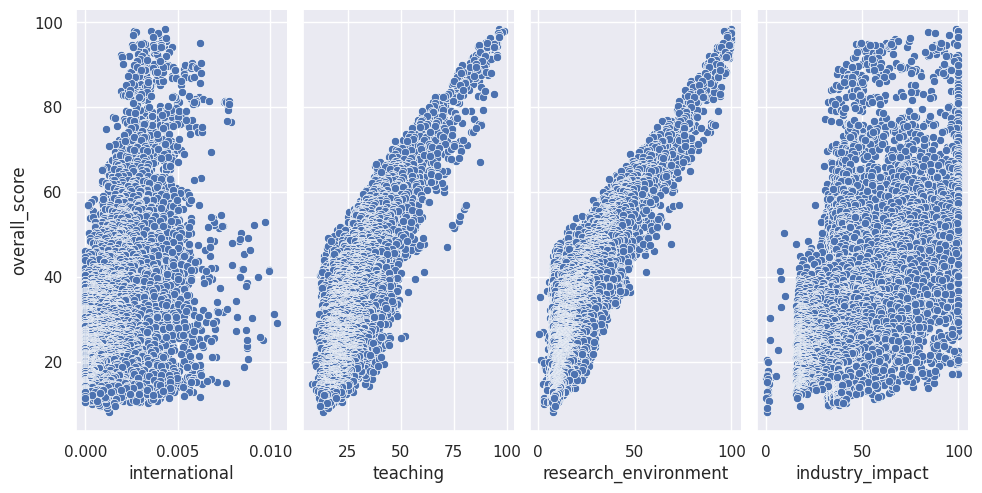

In [ ]:
# visualize the relationship between the features and the response using scatterplots
university['international'] = university['international_students']/university['international_outlook']
p = sns.pairplot(university, x_vars=['international', 'teaching','research_environment', 'industry_impact'], y_vars='overall_score', size=5,
                 aspect=0.5)

By looking at the plots above we can see that all of independent variables have a strong correlation with the Overall Score. However, none of them form an accurately linear shape, which means a linear model might not be able to efficiently explain the data in terms of variability, prediction and accuracy.

# Fitting a regression model

In [ ]:
selected_columns = ['international', 'teaching','research_environment', 'industry_impact']
x = university[selected_columns]
y = university.overall_score

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
model_reg = regr.fit(X_train,y_train)


We used 4 highest correlated variables with overall_score to fit a regression model. The chosen variables, namely 'international', 'teaching', 'research_environment', 'industry_impact' were selected based on their strong correlation with overall_score, aiming to capture influential factors in predicting the target variable. The regression model leverages these variables to establish a predictive relationship, allowing for the estimation of overall_score based on the observed values of the selected features.

# 2. Mean of residuals
Finding R^2 and Mean Residuals for Both Training and Test Data.
Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out.

In [ ]:
y_pred_test = regr.predict(X_test)

print("R squared: {}".format(r2_score(y_true=y_test,y_pred=y_pred_test)))

R squared: 0.8114422379851589


In our case, R squared is approximately 0.81, which means that about 81% of the variance in the test data is explained by the model.

In [ ]:
residuals_test = y_test.values-y_pred_test
mean_residuals_test = np.mean(residuals_test)
print("Mean of Residuals for test {}".format(mean_residuals_test))

Mean of Residuals for test -0.17356019566066125


In our case, interpreting this value, a mean residual close to zero indicates that, on average, the model's predictions are accurate and unbiased. However, since the mean residual is negative (-0.1736), it suggests that the model tends to slightly overpredict the target variable on average for the test set. This means that, on average, the actual target values tend to be slightly lower than the predicted values by approximately 0.1736 units.

In [ ]:
y_pred_train = regr.predict(X_train)

print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred_train)))

R squared: 0.8208272842435202


In our case, R squared is approximately 0.82, which means that about 82% of the variance in the train data is explained by the model.

In [ ]:
residuals_train = y_train.values-y_pred_train
mean_residuals_train = np.mean(residuals_train)
print("Mean of Residuals for train {}".format(mean_residuals_train))

Mean of Residuals for train 7.866124257717479e-16


The mean of residuals for the training set is approximately 7.866124257717479e-16. This value, very close to zero (approximately 0 in scientific notation), suggests that, on average, the model's predictions align almost perfectly with the actual target values in the training set. It indicates that the model captures the underlying patterns in the training data effectively and does not exhibit any systematic bias in its predictions for the training set.del.

In [ ]:
# now let's create a function that creates predictions on the features with the model and calculates residuals
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

    return df_results

In [ ]:
# now we are creating a linear assumption function that is designed to check the linearity assumption
#  of a linear regression model
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')

    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')

    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)

    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


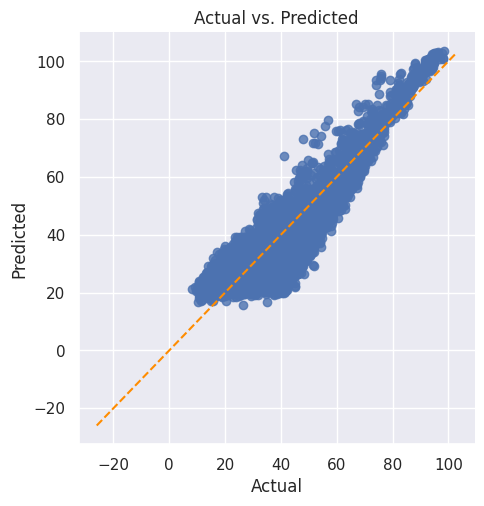

In [ ]:
linear_assumption(regr, X_train, y_train)

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


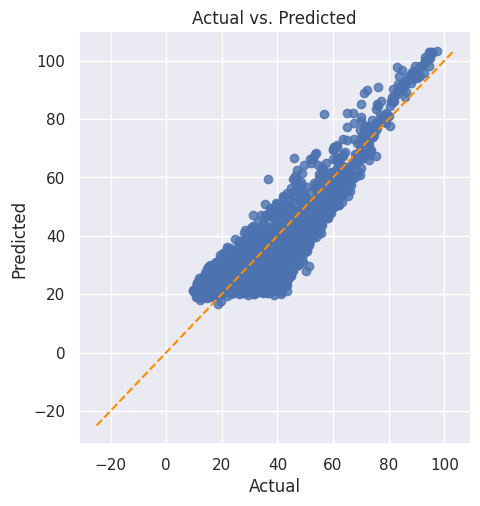

In [ ]:
linear_assumption(regr, X_test, y_test)

As can be seen on the scatter plots above, almost all points closely follow the diagonal line, which suggests that the majority of the predictions are in line with the linearity assumption.

# 3. Normality
Next we have to check the normality assumption, because it can cause problems while calculating confidence intervals. Skewness can be due to the presence of outliers and this can make bias while parameter estimation. The most powerful way of doing this by a Q-Q probability plot. The Quantile-Quantile is made by plotting the residuals vs the order of statistic. A Normal Q-Q plot can be used to determine if the assumption of normality is met. The points should fall on the diagonal line. Points lying far from the diagonal line are unusual observations and warrant further investigation.

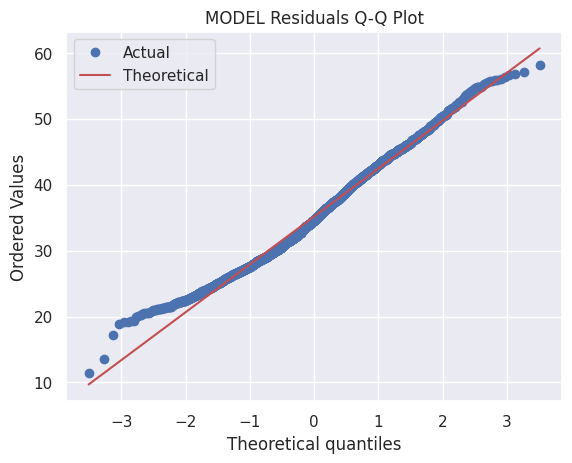

In [ ]:
import statsmodels.api as sm
model_test = sm.OLS(y_test,X_test).fit()

#Import library
from scipy import stats
stats.probplot(model_test.resid, dist="norm", plot= plt)
plt.title("MODEL Residuals Q-Q Plot")
plt.legend(['Actual','Theoretical'])
plt.show()

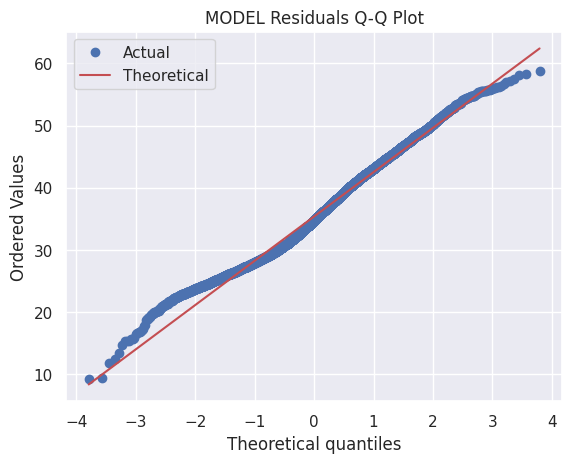

In [ ]:
model_train = sm.OLS(y_train,X_train).fit()

#Import library
from scipy import stats
stats.probplot(model_train.resid, dist="norm", plot= plt)
plt.title("MODEL Residuals Q-Q Plot")
plt.legend(['Actual','Theoretical'])
plt.show()

As you can see from the graphs above, most of the points closely follow the diagonal line, however, both of the graphs have points lying a little away from diagonal line, those might be unusual observations that warrant further investigation.

# 4. Independence of errors.
One of the assumptions of linear regression is that there is no correlation between the residuals. In other words, the residuals are assumed to be independent.

One way to determine if this assumption is met is to perform a Durbin-Watson test, which is used to detect the presence of autocorrelation in the residuals of a regression.

**This test uses the following hypotheses:**

H0 (null hypothesis):There is no correlation among the residuals.

HA (alternative hypothesis):The residuals are autocorrelated.

**The test statistic is approximately equal to 2*(1-r) where r is the sample autocorrelation of the residuals. Thus, the test statistic will always be between 0 and 4 with the following interpretation:**

*   A test statistic of 2 indicates no serial correlation.
*   The closer the test statistics is to 0, the more evidence of positive serial correlation.
*   The closer the test statistics is to 4, the more evidence of negative serial correlation.

**As a rule of thumb, test statistic values between the range of 1.5 and 2.5 are considered normal. However, values outside of this range could indicate that autocorrelation is a problem.**
1.   For positive serial correlation, consider adding lags of the dependent and/or independent variable to the model.
2.   For negative serial correlation, check to make sure that none of your variables are overdifferenced.
3. For seasonal correlation, consider adding seasonal dummy variables to the model.



In [ ]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
print(durbin_watson(model_train.resid), ' ', durbin_watson(model_test.resid))

0.07857354763919192   0.08291593388479412


While performing Durbin-Watson test, test statistic values for both train and test data showed a value close to 0. meaning that is evidence of positive serial correlation between the values. In order to fix it, we will need to consider adding lags of the dependent and/or independent variable to the model.

In [ ]:
print(model_test.summary())

                                 OLS Regression Results                                
Dep. Variable:          overall_score   R-squared (uncentered):                   0.147
Model:                            OLS   Adj. R-squared (uncentered):              0.146
Method:                 Least Squares   F-statistic:                              133.9
Date:                Fri, 16 Feb 2024   Prob (F-statistic):                   1.23e-105
Time:                        19:51:14   Log-Likelihood:                         -15541.
No. Observations:                3108   AIC:                                  3.109e+04
Df Residuals:                    3104   BIC:                                  3.111e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The uncentered R-squared value of 0.147 suggests that approximately 14.7% of the variability in the dependent variable, overall_score, is accounted for by the independent variables included in the model. This indicates a modest level of explanatory power. The F-statistic of 133.9, along with a very low p-value of 1.23e-105, indicates that the overall model is statistically significant, suggesting that the independent variables as a group have a significant impact on the dependent variable. However, when examining the coefficients of the individual independent variables, only two out of the four variables (x1 and x3) exhibit statistically significant effects on overall_score, as indicated by their respective p-values. Specifically, variables x1 and x3 show statistically significant positive impacts on overall_score, while variables x2 and x4 do not appear to have a statistically significant effect. These results provide insights into the relationship between the independent variables and the dependent variable, guiding further analysis and interpretation.

In [ ]:
print(model_train.summary())

                                 OLS Regression Results                                
Dep. Variable:          overall_score   R-squared (uncentered):                   0.154
Model:                            OLS   Adj. R-squared (uncentered):              0.154
Method:                 Least Squares   F-statistic:                              424.3
Date:                Fri, 16 Feb 2024   Prob (F-statistic):                        0.00
Time:                        19:51:14   Log-Likelihood:                         -46658.
No. Observations:                9322   AIC:                                  9.332e+04
Df Residuals:                    9318   BIC:                                  9.335e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

This model shows a better R-squared value than the previous one, indicating that around 15.4% of the variability in overall_score is explained by the independent variables. The F-statistic of 424.3 suggests that the model as a whole is statistically significant. The extremely low p-value (zero) supports the rejection of the null hypothesis that all coefficients are equal to zero, indicating that at least one independent variable has a statistically significant effect on the dependent variable.

# 4. Independence of errors

<ipython-input-47-41b3d0936285>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(model_test.resid,kde=True)


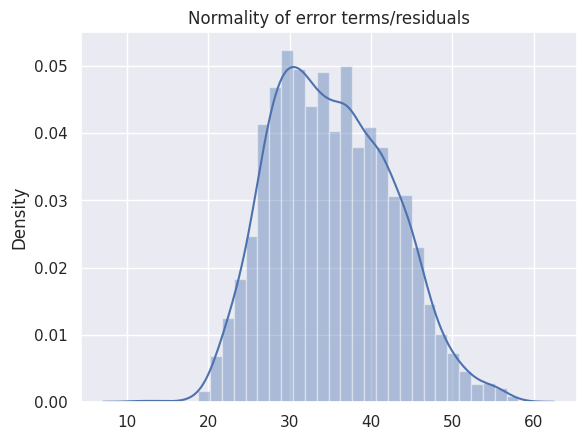

In [ ]:
p = sns.distplot(model_test.resid,kde=True)
p = plt.title('Normality of error terms/residuals')

<ipython-input-48-97f811230bf6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(model_train.resid,kde=True)


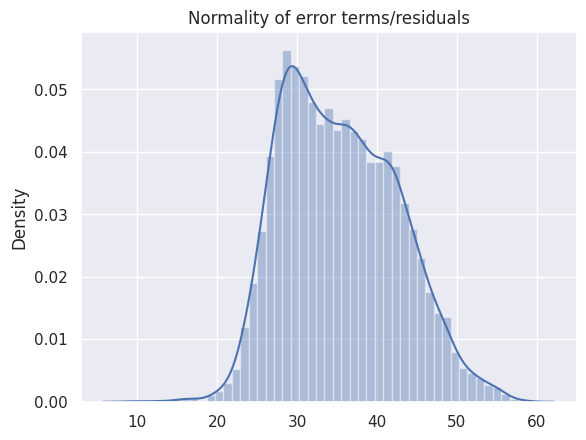

In [ ]:
p = sns.distplot(model_train.resid,kde=True)
p = plt.title('Normality of error terms/residuals')


The normality of the error terms, characterized by a bell-shaped distribution, suggests a general adherence to the assumption of normality in the residuals. However, the observed skewness indicates a slight departure from perfect symmetry. A skewed distribution typically implies that the residuals exhibit a subtle asymmetry, with one tail being longer than the other. While a degree of skewness may be tolerable in statistical analyses, especially if the departure from normality is minimal, it is essential to acknowledge this deviation and consider its potential impact on the reliability of statistical inferences.

# Check for Homescedasticity
Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.


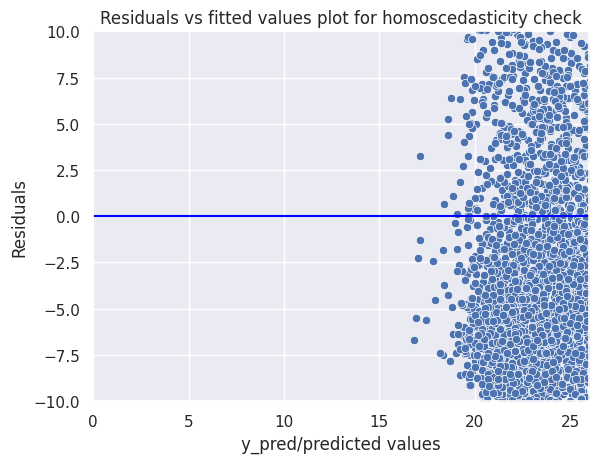

In [ ]:
p = sns.scatterplot(x=y_pred_train,y=residuals_train)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot(x=[0,26],y=[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

As you can see from the graph above, majority of the residuals are either on below of the blue line or consistently below the blue line, it suggests a potential pattern in the residuals. This pattern may indicate that the variance of residuals is not constant across all predicted values.

# 6. No multicollinearity
Multicollinearity occurs when the independent variables are correlated to each other. If the degree of multicollinearity is high it can cause problems while interpreting the results.
We can find the degree of correlation with the help of Variation Inflation Factor(VIF)
It can be interpreted as :

1= Not correlated

1-5 = Moderately correlated

greater than 5 = Highly correlated

Let's take a look at the results

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(university[['international', 'teaching','research_quality', 'industry_impact']].values,
                                               i) for i in range(x.shape[1])]
vif["features"] = university[['international', 'teaching','research_quality', 'industry_impact']].columns
vif.round(2)

,VIF Factor,features
0,3.42,international
1,8.86,teaching
2,5.53,research_quality
3,6.40,industry_impact


In our case, "teaching", "research_quality","industry_impact" have VIF values well above 5, suggesting a substantial degree of correlation. A VIF of the "research_qulity" and "teaching" are relatively high, indicating notable multicollinearity for variables. While not as extreme as the other two, it suggests some level of correlation with other predictors. Since all of the variables examine the substantion degree of correlation between the features, in order to take care of the multicollinearity issue, we will need either to remove some highly correlated variables, perform Principal Component Analysis for highly correlated variables or linearly add them together.

# Linear Regression without GridSearch But with Cross Validation

In [ ]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

regr = LinearRegression()

#Next we do cross validation, which splits apart our training data and fits the model on different samples and
# gives scores for each sample to get the best fit model before we test it on the testing data.

scores = cross_val_score(regr, X_train, y_train, cv = 5)    #cv is the number of folds, scores will give an array of scores

print ('Scores: ', scores, '\nMean Score: ', np.mean(scores), '\nSTD of Scores: ', np.std(scores))

#To get predictions (y_hat) and check them all in one using cross validation

predictions = cross_val_predict(regr, X_test, y_test, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = metrics.r2_score(y_test, predictions)  #this says the accuracy of the predictions from the best cv fold


#If this is good, continue to fit the model on the data


regr.fit(X_train, y_train)

y_hat = regr.predict(X_test)      #this gives me my predictions

print('\n\nmodel performance: ', regr.score(X_test, y_test))    #this tells me my model performance

(9322, 4) (9322,)
(3108, 4) (3108,)
Scores:  [0.82191634 0.82213689 0.81033568 0.8273428  0.8202174 ] 
Mean Score:  0.8203898231556748 
STD of Scores:  0.005564923197036328


model performance:  0.8114422379851589


# Linear Regression (The SGD Regressor) with GridSearchCV and RepeatedKFold CrossValidation

In [ ]:
# Linear Regression (The SGD Regressor) with GridSearchCV and RepeatedKFold CrossValidation

x1 = university[selected_columns]
y1 = university.overall_score

# define model
model = SGDRegressor()

cv = RepeatedKFold(n_splits=10, n_repeats=3) #RepeatedKFold means repeating KFold with different random state each time


## Ridge Regression
# For more information, you can visit this documentation.

# define parameters
param = {
    'penalty':['l1', 'l2', 'elasticnet'],
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'fit_intercept':[True, False],
    'eta0':[0.1, 0.01, 0.001, 0.0001],
    'tol': [1e-3, 1e-4, 1e-5],
    'max_iter': [1000, 2000, 3000]

}


# define search
search = GridSearchCV(model, param, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)
# execute search
result = search.fit(x1, y1)

# summarize result

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -7.361959328657802
Best Hyperparameters: {'alpha': 10.0, 'eta0': 0.001, 'fit_intercept': True, 'max_iter': 2000, 'penalty': 'elasticnet', 'tol': 1e-05}


# Scaling

In [ ]:
# Apply Scaling
x2 = university[selected_columns]
y2 = university.overall_score

#Perform Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(x2)

#Splitting the data into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y2, test_size=0.2, random_state=42)



# Regularization

# Best Fit Model

In [ ]:
regressors = [
    LinearRegression(),
    Lasso(),
     Ridge(),
    SGDRegressor(alpha=10.0, eta0= 0.001, tol= 1e-05, max_iter= 2000, fit_intercept= True, penalty = 'elasticnet' ),
    SGDRegressor()
]
for model in regressors[:5]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

LinearRegression()
	Training time: 0.007s
	Prediction time: 0.004s
	Explained variance: 0.8256985139186805
	Mean absolute error: 5.859575274703508
	R2 score: 0.8256796205015533

Lasso()
	Training time: 0.003s
	Prediction time: 0.002s
	Explained variance: 0.81740352864102
	Mean absolute error: 6.064346743456751
	R2 score: 0.8173541975616231

Ridge()
	Training time: 0.004s
	Prediction time: 0.001s
	Explained variance: 0.8256972448704137
	Mean absolute error: 5.859684107067235
	R2 score: 0.8256783284223052

SGDRegressor(alpha=10.0, eta0=0.001, max_iter=2000, penalty='elasticnet',
             tol=1e-05)
	Training time: 0.039s
	Prediction time: 0.004s
	Explained variance: 0.2832541231500558
	Mean absolute error: 11.65248226057845
	R2 score: 0.28279933171209237

SGDRegressor()
	Training time: 0.037s
	Prediction time: 0.000s
	Explained variance: 0.8256342243733964
	Mean absolute error: 5.863788523957258
	R2 score: 0.8255354808090731



## Conclusion

In conclusion, our analysis aimed to determine the main metrics influencing the selection of a university and answer the question of which metrics are most correlated with the dependent variable. Through our analysis, we found that the quality of teaching, international student support, research quality, and industry impact emerged as significant factors in choosing a university. These metrics, identified through our model's predictions, proved to be highly correlated with the overall performance of universities. Therefore, our analysis suggests that by prioritizing these key aspects, individuals can make informed decisions when selecting a university.